In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM

import os

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

For eROSITA 30.0x30.0 field we take all clusters within the lightcone (flag=0) with $M_{500}> 10^{14} M_{\odot}$:

In [2]:
clusters = pd.read_csv("../data/eROSITA_30.0x30.0/Catalouges/cluster.dat", sep='\s+')
clusters = clusters[clusters["M500"]>1e14]
clusters = clusters[clusters["flag"]==0]
clusters

ihal     x_pix     y_pix     z_pix      Rrel          Mvir    z_true  \
171     110  0.970969  0.479718  0.014316  0.004703  2.432930e+14  0.157249   
187     163  0.388924  0.570999  0.016006  0.004675  2.390080e+14  0.157312   
350      77  0.380183  0.570491  0.033800  0.005197  3.282700e+14  0.157977   
820      68  0.735543  0.863489  0.086085  0.005228  3.341870e+14  0.159935   
1245    111  0.804864  0.355207  0.133510  0.004668  2.379170e+14  0.161713   
...     ...       ...       ...       ...       ...           ...       ...   
18589   113  0.839159  0.495644  0.394607  0.011199  2.242680e+14  0.063945   
18610   199  0.149218  0.307198  0.406194  0.011455  2.400200e+14  0.064342   
19523   349  0.373303  0.943536  0.987909  0.010375  1.783400e+14  0.084342   
19771   323  0.759637  0.387809  0.508332  0.020783  1.912580e+14  0.034099   
19787    83  0.926032  0.822913  0.526959  0.026050  3.766600e+14  0.034717   

          z_obs          M500     R500      Mstar500       Mgas500     T500  \
171    0.157891  1.366960e+14  688.128  4.470500e+12  1.209540e+13  2.44633   
187    0.159659  1.126680e+14  645.187  2.896080e+12  1.061830e+13  2.43074   
350    0.157810  1.925340e+14  771.351  5.156740e+12  2.121000e+13  3.21771   
820    0.160192  1.800240e+14  754.271  6.340420e+12  1.596800e+13  3.57076   
1245   0.161111  1.321030e+14  680.349  4.667490e+12  9.869480e+12  2.78095   
...         ...           ...      ...           ...           ...      ...   
18589  0.063977  1.184480e+14  615.838  2.883010e+12  1.160680e+13  2.22808   
18610  0.064928  1.282700e+14  632.408  3.427130e+12  1.130680e+13  2.26553   
19523  0.084015  1.055570e+14  592.650  3.313370e+12  6.942770e+12  2.39539   
19771  0.033707  1.272360e+14  616.706  3.593030e+12  1.067760e+13  2.61661   
19787  0.033992  1.682650e+14  676.952  5.699780e+12  1.686950e+13  2.84568   

          Lx500    Ysz500          M200      R200  flag  
171    0.707698  0.000003  2.049620e+14  1068.920     0  
187    0.532571  0.000003  2.049290e+14  1068.880     0  
350    1.515690  0.000005  2.887220e+14  1198.270     0  
820    0.972861  0.000004  2.724390e+14  1175.290     0  
1245   0.452088  0.000003  1.944720e+14  1050.360     0  
...         ...       ...           ...       ...   ...  
18589  0.537683  0.000002  1.889120e+14   976.536     0  
18610  0.455429  0.000002  1.935300e+14   984.440     0  
19523  0.231120  0.000002  1.464050e+14   897.005     0  
19771  0.651073  0.000003  1.638830e+14   910.698     0  
19787  0.951228  0.000004  2.866160e+14  1097.250     0  

[84 rows x 18 columns]

ihal: HaloID

x_pix,y_pix: position of the cluster in the Lightcone [0..1]. Multiply by 30
             degree to get position in sky.
             
z_pix:       relative position within the slice [0..1]

Note on x_pix,y_pix,z_pix: Objects are included if their size overlaps with the
                           Lightcone, therefore these central positions can be
                           slightly outside the Lightcone. The value of flag 
                           (last column) indicates if a object is fully within
                           the Lightcone (0) or if it is only partially within
                           the Lightcone (1).
                           
Rrel:        relative size of the virial radius (TopHat). Multiply by 30 degree
             to obtain the size of the virial radius on the sky.
             
Mvir         Nvir (TopHat) in Msol/h

z_true:      real redshift of the object (use this for distances)

z_obs:       redshift as spectroscopicly observed (use this as observed redshift)

M500:        M500 (critical) in Msol/h

R500:        R500 (critical) in kpc/h

Mstar500:    Stellar mass within R500 (critical) in Msol/h

Mgas500:     Gas mass within R500 (critical) in Msol/h

T500:        Mass weighted temperature within R500 (critical) in keV

Lx500:       Bolometric X-Ray luminosity within R500 (critical) in 1e44 erg/s

Ysz500:      ComptonY within R500 (critical)

M200:        M200 (critical) in Msol/h

R200         R200 (critical) in kpc/h

flag:        Indication if object is fully (=0) or only partial (=1) within the
             Lightcone.

In [37]:
len(clusters), min(clusters["z_true"]), max(clusters["z_true"])

(84, 0.034098784, 0.19434476)

ZuHone's figure 1:

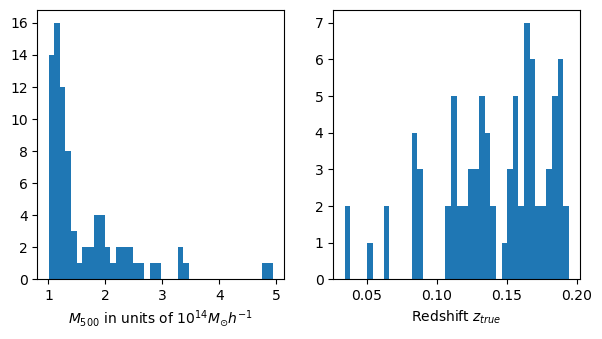

In [4]:
plt.figure(figsize = (7,3.5))

plt.subplot(121)
plt.hist(clusters["M500"]/10**14, bins=40, histtype='stepfilled')
plt.xlabel("$M_{500}$ in units of $10^{14} M_{\odot} h^{-1}$")

plt.subplot(122)
plt.hist(clusters["z_true"], bins=40, histtype='stepfilled')
plt.xlabel("Redshift $z_{true}$")

plt.show()

The redshift used in computing distances $z_{true}$ is obtained by computing the offset of the cluster center from the center of the slice, and the redshift used in fitting spectra $z_{obs}$ also takes into account the peculiar velocity of the cluster within the slice. 

Plotting all these clusters in 2D:

In [56]:
x_c = 30*clusters["x_pix"].values    # deg
y_c = 30*clusters["y_pix"].values    # deg
z_c = clusters["z_pix"]              # relative position within the slice [0...1]

r_500 = clusters["R500"].values        # kpc/h
redshifts = clusters["z_true"].values

h = 0.704
Omega_M = 0.272
D_A = FlatLambdaCDM(H0=100*h, Om0=Omega_M).angular_diameter_distance(redshifts) # Mpc

r_500_rescaled = [num/denom*180/np.pi for num, denom in zip(r_500/h, 1000*D_A.value)]  # degrees

In [6]:
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.patches import Circle

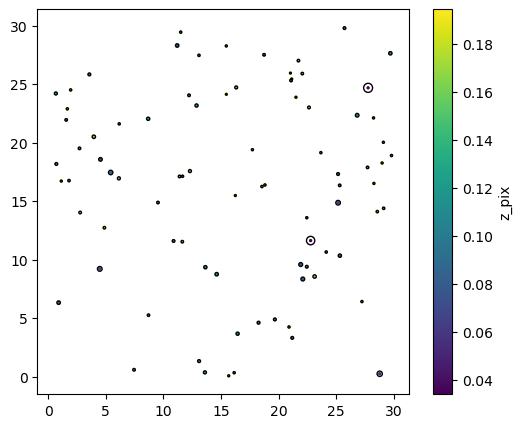

In [57]:
plt.figure(figsize=(6,5))#, layout='constrained')

plt.scatter(x_c, y_c, c=redshifts, cmap='viridis', s=2)

for xc, yc, r in zip(x_c, y_c, r_500_rescaled):
    plt.gca().add_patch( plt.Circle( (xc, yc), r, fill = False) )
    
plt.colorbar(label='z_pix')

plt.show()

Adding slices from Phox and drawing in 3D:

In [58]:
wd = "/home/aleksei/work/clusters/data/eROSITA_30.0x30.0/Phox/"
mylist = sorted(os.listdir(wd))

phlists = [item for item in mylist if item[:6] == "phlist"]

phlists_redshifts = [fits.open(wd+item)[0].header["REDSHIFT"] for item in phlists][::-1]

print(phlists_redshifts)

dif = np.diff(phlists_redshifts)
print(dif)

[0.032637492755919, 0.0663401914452304, 0.101142861718869, 0.13708140389145, 0.174192889973847]
[0.0337027  0.03480267 0.03593854 0.03711149]


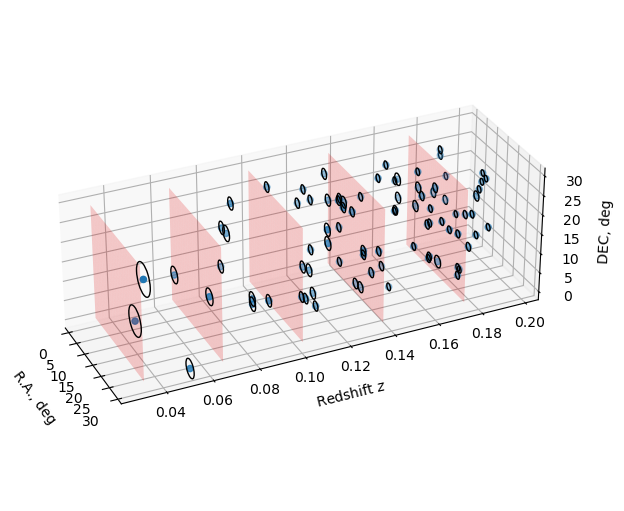

In [59]:
fig = plt.figure(figsize=(6,5), layout="constrained")

ax = fig.add_subplot(projection='3d')

ax.scatter(x_c, redshifts, zs=y_c, zdir='z', cmap='viridis')

for xc, yc, r, rdsh in zip(x_c, y_c, r_500_rescaled, redshifts):
    p = Circle( (xc, yc), r*10, fill = False)
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=rdsh, zdir="y")

ax.set_xlabel("R.A., deg")
ax.set_ylabel('\n \n Redshift $z$')
ax.set_zlabel("DEC, deg")

xx, yy = np.meshgrid(range(30), range(30))
for rdsh in phlists_redshifts:
    ax.plot_surface(xx, rdsh, yy, alpha=0.2, color='red')

ax.view_init(elev=30., azim=-25)

ax.set_box_aspect(aspect = (1,3,1), zoom = 1)

plt.show()

Searching for photons from these clusters in photon lists.

Programs distributed with HEASOFT are called “ftools”. If you want to know more about the parameters of an FTOOL, use the command fhelp ftoolname where “ftoolname” is the name of the FTOOL. To get a list of all available FTOOLS, use fhelp ftools.

In [61]:
!fstruct ../data/eROSITA_30.0x30.0/Phox/phlist_140.fits

  No. Type     EXTNAME      BITPIX Dimensions(columns)      PCOUNT  GCOUNT
 
   0  PRIMARY                  8     0                           0    1
   1  BINTABLE SRC_CAT         8     78(10) 1                    0    1
 
      Column Name                Format     Dims       Units     TLMIN  TLMAX
      1 SRC_ID                     K
      2 SRC_NAME                   26A
      3 RA                         E                   deg
      4 DEC                        E                   deg
      5 E_MIN                      E                   keV
      6 E_MAX                      E                   keV
      7 FLUX                       E                   erg/s/cm**2
      8 SPECTRUM                   10A
      9 IMAGE                      10A
     10 TIMING                     4A
 
   2  BINTABLE PHLIST          8     12(3) 7268685               0    1
 
      Column Name                Format     Dims       Units     TLMIN  TLMAX
      1 ENERGY                     E              

In [62]:
hdul = fits.open("../data/eROSITA_30.0x30.0/Phox/phlist_140.fits")
hdul.info()

Filename: ../data/eROSITA_30.0x30.0/Phox/phlist_140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  SRC_CAT       1 BinTableHDU     40   1R x 10C   [K, 26A, E, E, E, E, E, 10A, 10A, 4A]   
  2  PHLIST        1 BinTableHDU     24   7268685R x 3C   [E, E, E]   


In [63]:
display(hdul[0].header)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
SIMUL   = 'Magneticum_Box2_hr' / Simulation name                                
SNAPNUM =                  140 / Snapshot nuber                                 
REDSHIFT=    0.032637492755919 / Redshift of simulation                         
MODE    =                    1 / 1=ICM,2=AGM,3=ICM+AGN                          
INSTR   = 'UNSPECIFIED'        / Instrument name                                
AREA    =                1000. / Nominal area of instrument [cm2]               
TIME    =               10000. / Nominal observation time [sec]                 
XC      =             305341.4 / Center X Position [kpc/h]                      
YC      =            149855.

ATTENTION! This picture is time-consuming.

0.032637492755919
0.0663401914452304
0.101142861718869
0.13708140389145
0.174192889973847


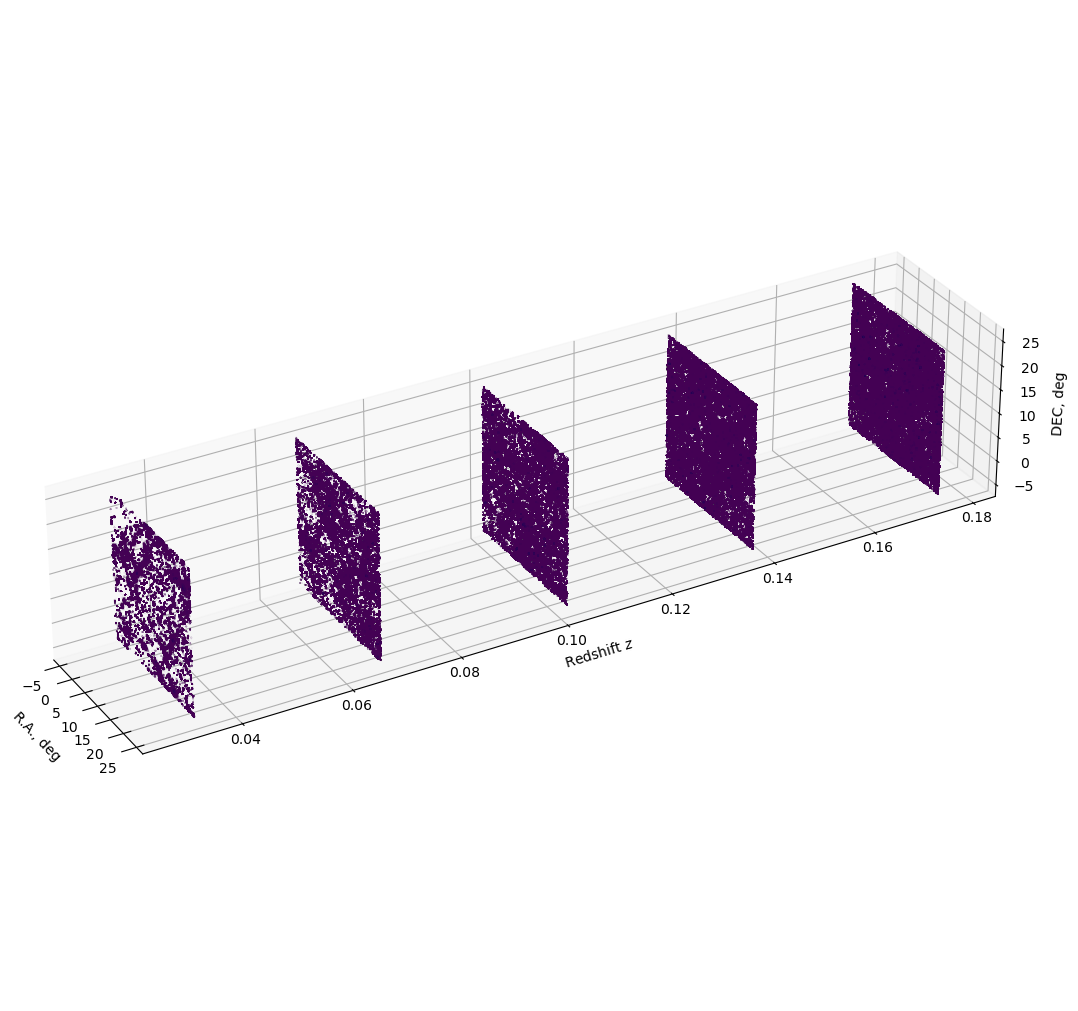

In [15]:
fig = plt.figure(figsize=(10,10), layout="constrained")
ax = fig.add_subplot(projection='3d')

ENE = []

for item in mylist[::-1]:
        
    hdul = fits.open(wd+item)
    redshift = hdul[0].header["REDSHIFT"]
    print(redshift)

    SLICE = pd.DataFrame(hdul[2].data[:])

    ra = SLICE["RA"]
    dec = SLICE["DEC"]
    ene = SLICE["ENERGY"]

    # By using zdir='y', the y value of these points is fixed to the zs value 0
    # and the (x, y) points are plotted on the x and z axes.
    
    ax.scatter(ra, redshift, zs=dec, zdir='z', c=ene, 
               #norm=colors.LogNorm(vmin=ene.min(), vmax=ene.max()),
               cmap='viridis', s=0.001) #ene/max(ene), alpha=ene/max(ene))
    
    ax.set_xlabel("R.A., deg")
    ax.set_ylabel('\n \n Redshift $z$')
    ax.set_zlabel("DEC, deg")
    #ax.set_xlim(13, 7)
    #ax.set_zlim(7, 13)
    
    ENE = np.concatenate((ENE, ene))

    hdul.close()

mappable = cm.ScalarMappable()
mappable.set_array(ENE)
#fig.colorbar(mappable, label='Energy, keV', 
#             location="bottom", fraction=0.046, pad=0.04) # shrink=0.5, aspect=10

# Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
ax.view_init(elev=30., azim=-30)

ax.set_box_aspect(aspect = (1,5,1), zoom = 1)

#fig.set_constrained_layout(True)
#fig.set_layout_engine("constrained")

plt.show()